In [138]:
%matplotlib widget
%load_ext rich
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [48]:
def get_cycle_period_from_filename(filename: str):
    import re
    m = re.match('CyclePeriod(\d+)\.xlsx', filename)
    if m:
        return float(m.groups()[0])

In [110]:
def generate_triangular_wave(t, freq=1, amplitude=1, phase=0, offset=0):
    import scipy.signal
    y = amplitude/2 * scipy.signal.sawtooth(2*np.pi*freq*t+phase, width=0.5) + offset
    # NB: amplitude is /2 because the sawtooth wave has an amplitude of 2 (from 1 to -1)
    return y

In [111]:
#define ANGLE_BASE 90  // This is the angle at which the device idles
#define ANGLE_MAX 125  // this is the angle at the end of the movements
#define ANGLE_MIN 55  // this is the angle at the other end

angle_base = 90
angle_max = 125
angle_min = 55

# in the excel files, angles are referenced to 90deg
angle_base -= angle_base
angle_max -= angle_base
angle_min -= angle_base

In [112]:
# values determined empirically from the files

In [113]:
files = Path('./').glob('*.xlsx')

offsets = []
amps = []

for file in files:
    T = get_cycle_period_from_filename(file.as_posix())
    if T:
        df = pd.read_excel(file)
        offsets.append(df.iloc[:, 1].mean())
        amps.append(df.iloc[:, 1].max()-df.iloc[:, 1].min())

offset = np.mean(offsets)
amp = np.mean(amps)
print(f'offset = {offset} | {offsets}')
print(f'amp = {amp} | {amps}')


offset = 9.950318564415833 | [10.617910447761192, 10.921518987341772, 11.779787234042553, 11.196330275229357, 4.804166666666666, 9.963888888888889, 10.368627450980393]
amp = 71.44285714285714 | [73.1, 73.9, 75.0, 75.80000000000001, 56.599999999999994, 71.0, 74.7]


In [114]:
phi = -np.pi/2  # set by the arduino sketch

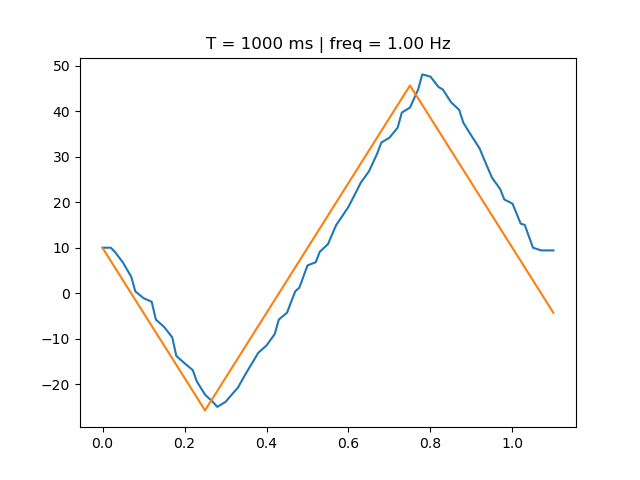

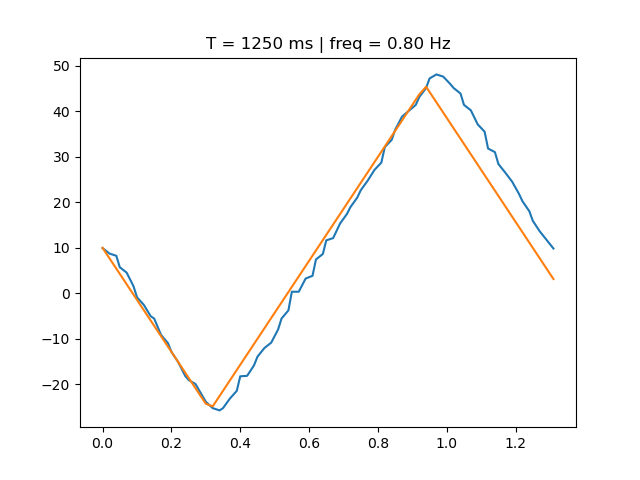

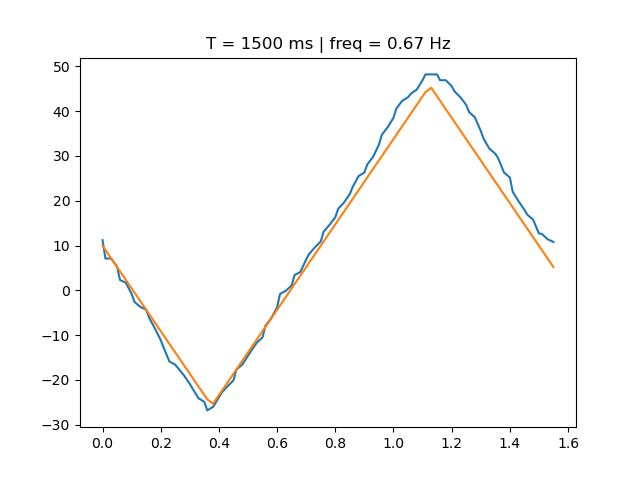

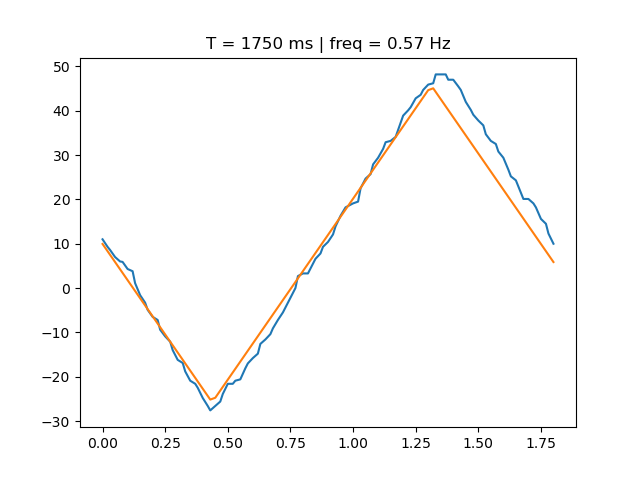

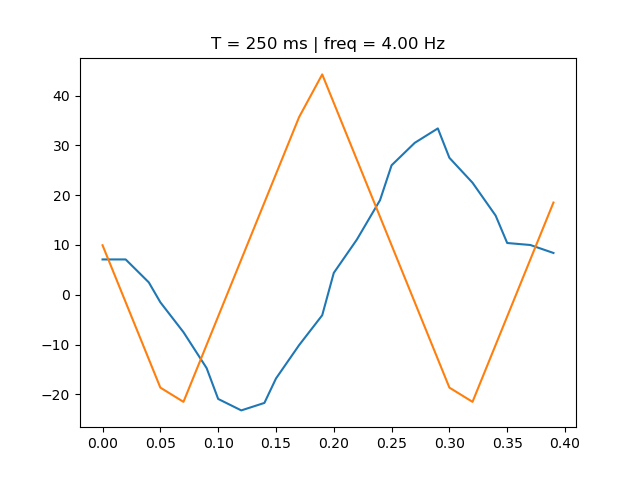

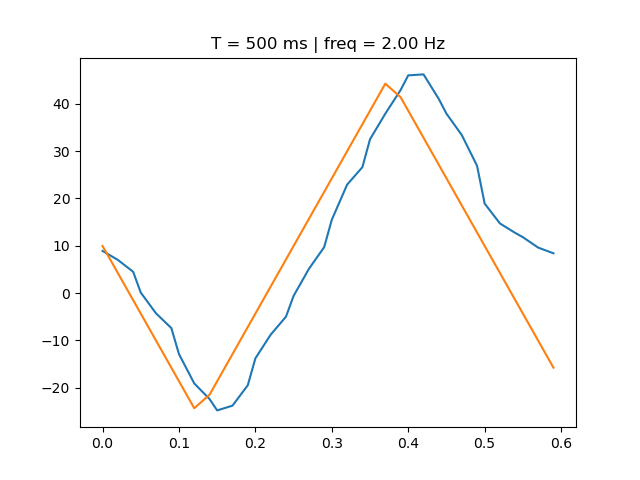

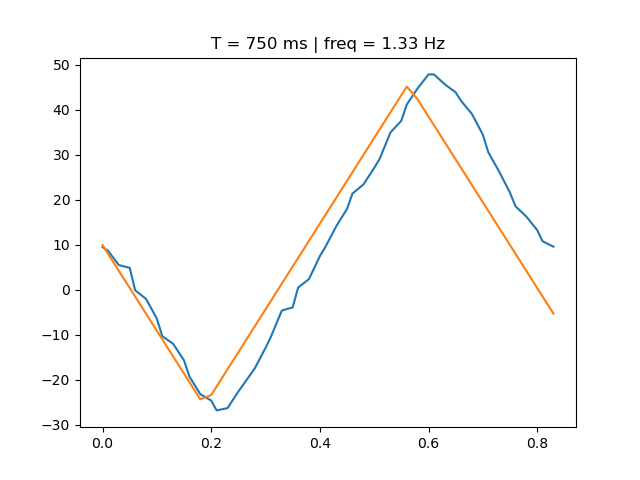

In [152]:
files = Path('./').glob('*.xlsx')

temp = []

for file in files:
    T = get_cycle_period_from_filename(file.as_posix())
    if T:
        f = 1e3/T  # T is in ms
        df = pd.read_excel(file)
        t = df.iloc[:,0]
        y = df.iloc[:,1]
        Y = generate_triangular_wave(t, freq=f, amplitude=amp, phase=phi, offset=offset)
        
        temp.append(pd.Series(dict(Period=T, Err=np.sqrt(np.mean(np.square(y-Y))))))
        
        plt.figure()
        plt.plot(t,y, label='measured')
        plt.plot(t,Y, label='theory')
        plt.title(f'T = {T:.0f} ms | freq = {f:.2f} Hz')

In [153]:
result = pd.concat(temp, axis=1).T

In [154]:
result.sort_values(by='Period', ascending=True, inplace=True)

In [155]:
result

,Period,Err
4,250.0,28.633136
5,500.0,10.774160
6,750.0,8.573769
0,1000.0,6.619163
1,1250.0,4.557320
2,1500.0,3.567606
3,1750.0,3.804743


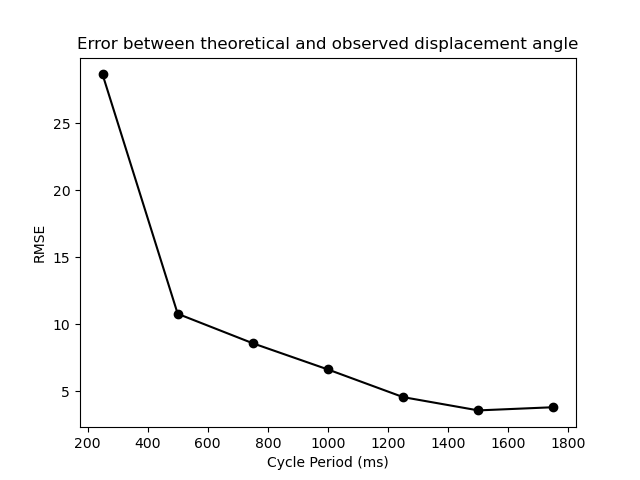

In [157]:
fig, ax = plt.subplots()
ax.errorbar(x=result['Period'], y=result['Err'], yerr=None, fmt='ko-', capsize=5)
ax.set_xlabel('Cycle Period (ms)')
ax.set_ylabel('RMSE')
ax.set_title('Error between theoretical and observed displacement angle')

In [158]:
1/240

0.004166666666666667